# Importing 

In [1]:
#pip install aiohttp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")
ds = cat.satellites.GOES16.latlongrid.to_dask()

# Getting to know the Dataset

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 1440, lat: 2640, lon: 2200)
Coordinates:
  * lat      (lat) float64 18.0 17.99 17.99 17.99 ... 8.013 8.009 8.006 8.002
  * lon      (lon) float64 -62.0 -61.99 -61.99 -61.98 ... -50.01 -50.01 -50.0
  * time     (time) datetime64[ns] 2020-02-02T00:00:48.400000 ... 2020-02-02T...
Data variables:
    C13      (time, lat, lon) float64 ...
Attributes: (12/14)
    title:                           Geostationary satellite imagery from GOE...
    description:                     GOES16 satellite data regridded on a reg...
    converted_by:                    Hauke Schulz (hauke.schulz@mpimet.mpg.de)
    institution:                     Max Planck Institute for Meteorology, Ha...
    Conventions:                     CF-1.7
    python_version:                  3.6.10 |Anaconda, Inc.| (default, Mar 23...
    ...                              ...
    version:                         --
    source:                          gcp-public-data-goes-16/ABI-L1b-RadM/202...
    history:                         Thu Dec 10 01:26:41 2020: ncrcat --no_tm...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.8.21
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
ds.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 1440, lat: 2640, lon: 2200)
Coordinates:
  * lat      (lat) float64 18.0 17.99 17.99 17.99 ... 8.013 8.009 8.006 8.002
  * lon      (lon) float64 -62.0 -61.99 -61.99 -61.98 ... -50.01 -50.01 -50.0
  * time     (time) datetime64[ns] 2020-02-02T00:00:48.400000 ... 2020-02-02T...
Data variables:
    C13      (time, lat, lon) float64 ...
Attributes: (12/14)
    title:                           Geostationary satellite imagery from GOE...
    description:                     GOES16 satellite data regridded on a reg...
    converted_by:                    Hauke Schulz (hauke.schulz@mpimet.mpg.de)
    institution:                     Max Planck Institute for Meteorology, Ha...
    Conventions:                     CF-1.7
    python_version:                  3.6.10 |Anaconda, Inc.| (default, Mar 23...
    ...                              ...
    version:                         --
    source:                          gcp-public

In [6]:
ds.coords

Coordinates:
  * lat      (lat) float64 18.0 17.99 17.99 17.99 ... 8.013 8.009 8.006 8.002
  * lon      (lon) float64 -62.0 -61.99 -61.99 -61.98 ... -50.01 -50.01 -50.0
  * time     (time) datetime64[ns] 2020-02-02T00:00:48.400000 ... 2020-02-02T...

In [7]:
ds.attrs

{'title': 'Geostationary satellite imagery from GOES16 on regular grid',
 'description': 'GOES16 satellite data regridded on a regular grid',
 'converted_by': 'Hauke Schulz (hauke.schulz@mpimet.mpg.de)',
 'institution': 'Max Planck Institute for Meteorology, Hamburg, Germany',
 'Conventions': 'CF-1.7',
 'python_version': '3.6.10 |Anaconda, Inc.| (default, Mar 23 2020, 23:13:11) \n[GCC 7.3.0] (with pyresample version: 1.16.0; satpy: 0.23.0)',
 'creation_date': 'Sat Dec  5 18:11:30 2020',
 'created_with': 'download_GOES16.py with its last modification on Tue Dec  1 18:42:43 2020',
 'version': '--',
 'source': 'gcp-public-data-goes-16/ABI-L1b-RadM/2020/033/00/OR_ABI-L1b-RadM2-M6C13_G16_s20200330000484_e20200330000553_c20200330001008.nc',
 'history': 'Thu Dec 10 01:26:41 2020: ncrcat --no_tmp_fl /bdd/EUREC4A/data/SATELLITES/GOES-E/0.5km_01min/2020/2020_02_02/GOES_13_8N-18N-62W-50W_20200202_0000.nc /bdd/EUREC4A/data/SATELLITES/GOES-E/0.5km_01min/2020/2020_02_02/GOES_13_8N-18N-62W-50W_202002

In [8]:
ds['lat']

<xarray.DataArray 'lat' (lat: 2640)>
array([17.998106, 17.994318, 17.99053 , ...,  8.00947 ,  8.005682,  8.001894])
Coordinates:
  * lat      (lat) float64 18.0 17.99 17.99 17.99 ... 8.013 8.009 8.006 8.002
Attributes:
    standard_name:  latitude
    units:          degree_north

In [9]:
da = ds.C13
da

<xarray.DataArray 'C13' (time: 1440, lat: 2640, lon: 2200)>
[8363520000 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 18.0 17.99 17.99 17.99 ... 8.013 8.009 8.006 8.002
  * lon      (lon) float64 -62.0 -61.99 -61.99 -61.98 ... -50.01 -50.01 -50.0
  * time     (time) datetime64[ns] 2020-02-02T00:00:48.400000 ... 2020-02-02T...
Attributes:
    _ChunkSizes:  [1, 660, 550]

IndexError: index 0 is out of bounds for axis 0 with size 0

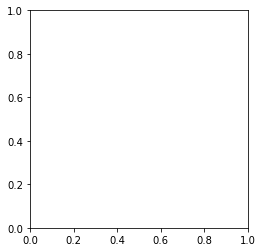

In [18]:

da_test = da[0,:,:]
plt.imshow(da_test,cmap='Greys')

In [ ]:
type(da)

In [ ]:
trunc_lat = ds['lat'][:10]
trun_lon = ds['lon'][:10]
trun_time = ds['time'][:10]

In [ ]:
da1D = da.isel(lat=1,lon=1)

In [ ]:
test = da[:20,1,1]
test

In [ ]:
test

In [ ]:
test.plot()

In [ ]:
test1 = da[:10, :10, :10]

In [ ]:
#variation along latitude
test1.isel(lon=7, lat=[6, 7, 9]).plot.line(x="time")

In [ ]:
#variation along latitude
test1.isel(time=9, lon=[8, 9]).plot(y="lat", hue="lon")

In [12]:
test2d = da.isel(time=20)

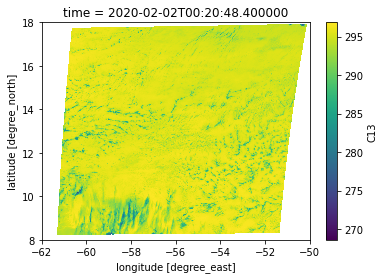

In [13]:
test2d.plot()

In [ ]:
test2d.plot.contourf()

In [ ]:
test2d.T.plot.surface()

In [ ]:
t = da.isel(time=slice(0, 365 * 4, 250))

In [ ]:
t.coords

In [ ]:
#g_simple = t.plot(x="lon", y="lat", col="time", col_wrap=3)

In [ ]:
#test 2 is made to figure out what each slice corresponds to
test2 = da[:9, :10, :11]
print(len(test2.values)) #time stamps
print(len(test2.values[0])) #latitude values
print(len(test2.values[0][0])) #longitude values


In [14]:
test2d.shape

(2640, 2200)

## Cloud mask

Mask: we want to restrict our analysis to images that have a 25th percentile of brightness temp. > 285K. Per time stamp? 

In [15]:
#First, trying over 1 image: 
image_test = test2d

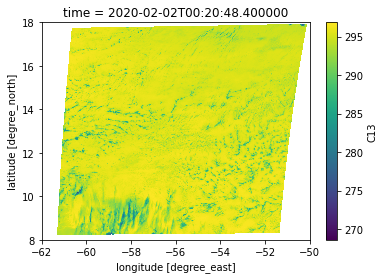

In [16]:
image_test.plot()

In [17]:
image_test.shape

(2640, 2200)

In [ ]:
image_test.values[0] 

In [ ]:
cloud_mask = image

In [ ]:
print(len(image_test))
print(len(mask_true))

In [ ]:
import numpy.ma as ma
dummy_array = np.array([[1, 0],[3,4]])
dummy_array.shape
np.percentile(dummy_array, 25)

dummy2_array = np.array([[3, 4],[1,0]])
dummy_dataset = np.array([dummy_array, dummy2_array])
np.percentile(dummy_array, 25)


In [ ]:
print('shape of an image', image_test.shape)
print('For a given latitude, this is an array of longitude', image_test[0].values)
print('Accessing a specific value given a longitude', image_test[0][0].values)

In [ ]:
#Include tag if marine low-cloud object or not ('True' if 280K<Tb<290K)
# Find if 25th percentile Tb is >285

T25 = np.percentile(image_test, 25)
print(T25)
if T25 > 285:
    # Create mask where 285<Tb<290
    mask = np.zeros(image_test.shape)
    mask[(image_test > 285) & (image_test < 290)] = 1
    
mask



In [ ]:
lat_test = (float(image_test['lat'][0]), float(image_test['lat'][-1]) )
lon_test = (float(image_test['lon'][0]), float(image_test['lon'][-1]) )
print(lon_test, lat_test)



In [ ]:
float(image_test['lat'][0])

In [ ]:
mask.shape

In [ ]:
image_test.shape

In [ ]:
import os
os. getcwd()

In [ ]:
from Metrics.cf import CF

In [ ]:
import h5py

In [ ]:
h5f = h5py.File('data.h5', 'w')
h5f.create_dataset('dataset_1', data=mask)
h5f.close()

In [ ]:
import cloudmetrics
cf = cloudmetrics.mask.cloud_fraction(mask)

fd = cloudmetrics.mask.fractal_dimension(mask)
print(fd)
#directional alignment
orient = cloudmetrics.mask.orientation(mask)
print(orient)

#largest and average area of open sky
#opensky = cloudmetrics.mask.open_sky(mask)
#print(opensky)


In [ ]:
#mask for multiple images
test = da[:20,1,1]

In [ ]:
'''masks = []
for i in test:
    T25 = np.percentile(i, 25)
    print(T25)
    if T25 > 285:
        # Create mask where 285<Tb<290
        mask = np.zeros(image_test.shape)
        mask[(image_test > 285) & (image_test < 290)] = 1
        masks.append(mask)
masks'''

In [ ]:
'''#multiple cf
test = da[:10,:10,:10]

masks = []
for i in test:
    T25 = np.percentile(i, 25)
    print(T25)
    if T25 > 285:
        # Create mask where 285<Tb<290
        mask = np.zeros(image_test.shape)
        mask[(image_test > 285) & (image_test < 290)] = 1
        masks.append(mask)
masks'''


In [ ]:
'''cfs = []
fds = []
orients = []
openskys = []

for m in masks: 
    
    #Cloud fraction
    #cf = cloudmetrics.mask.cloud_fraction(m)
    #cfs.append(cf)
    
    
    #Fractal dimension
    fd = cloudmetrics.mask.fractal_dimension(m)
    fds.append(fd)
    
    #directional alignment
    orient = cloudmetrics.mask.orientation(m)
    orients.append(orient)
    
    #largest and average area of open sky
    #opensky = cloudmetrics.mask.open_sky(m)
    #openskys.append(opensky)
'''

In [ ]:
#print(cfs)

In [ ]:
#print(fds)

In [ ]:
#print(orients)

In [ ]:
#print(openskys)

In [ ]:
#Plot metrics relative to latitude and longitude 

Hauke's dataset for labels: sugar, flower, ... 

get for a same scene different days and calculate cf and fds (open sky takes ages)



In [ ]:
#seperate dataset into scenes

In [ ]:
scene1twodays = da[:2, :10, :10]
scene1twodays

In [ ]:
testdf = da[4, :10, :10]
testdf.plot()

In [ ]:
testdf.shape

In [ ]:
scene1twodays.shape
scene1twodays[0].shape

In [ ]:
'''masks = []
for i in scene1twodays:
    i.plot()
    T25 = np.percentile(i, 25)
    print(T25)
    print(i.shape)
    if T25 > 285:
        # Create mask where 285<Tb<290
        mask = np.zeros(i.shape)
        print(mask)
        mask[(i > 285) & (i < 290)] = 1
        masks.append(mask)
masks'''

In [ ]:
df = pd.DataFrame(testdf)

In [ ]:
df

In [ ]:
testdf = da[:5, :10, :10]


In [ ]:
testsplit = da[3:5, :10, :10]

# Hauke's dataset (change testdf in Hauke_subset)

In [ ]:
#Hauke_subset = ds(ds['lat'] < 20, ds['lat'])
#Hauke_subset

In [ ]:
#Getting Hauke's subset: 10-20N, 58W-48W
indices_subset = []
latitudes = np.where((da['lat'] < 20)) #no need for lower bboundary as Hauke's takes 10 upwards
longitudes = np.where((da['lon'] < -48) & (da['lon'] > -58))

lat_min = min(latitudes[0])
lat_max = max(latitudes[0])
long_min = min(longitudes[0])
long_max = max(longitudes[0])

# v CHANGE TIME PERIOD HERE v

In [ ]:
Hauke_subset = da[:10, lat_min:lat_max, long_min:long_max ]
Hauke_subset.plot()

In [ ]:
#for each day, calculate mask
masks = []
for i in Hauke_subset:
    T25 = np.percentile(i, 25)
    if T25 > 285:
        # Create mask where 285<Tb<290
        mask = np.zeros(i.shape)
        mask[(i > 285) & (i < 290)] = 1
        masks.append(mask)


In [ ]:
#for each mask, calculate  metrics [time1(cf, fd, orient)], [time2(cf, fd, orient)]

data = []
for i,m in enumerate(masks): 
    data_scene = []
    lat_range = (float(Hauke_subset['lat'][-1]), float(Hauke_subset['lat'][0]) )
    lon_range = (float(Hauke_subset['lon'][-1]), float(Hauke_subset['lon'][0]) )
    time = np.datetime_as_string(Hauke_subset['time'][i])
    data_scene.append(lat_range)
    data_scene.append(lon_range)
    data_scene.append(time)
    #Cloud fraction
    cf = cloudmetrics.mask.cloud_fraction(m)
    data_scene.append(cf)
    
    #Fractal dimension
    fd = cloudmetrics.mask.fractal_dimension(m)
    data_scene.append(fd)
    
    #directional alignment
    orient = cloudmetrics.mask.orientation(m)
    data_scene.append(orient)
    
    #open sky
    #open_sky = cloudmetrics.mask.open_sky(m)
    #data_scene.append(open_sky)
    
    '''#OBJECTS
    scai = cloudmetrics.objects.scai(m)
    data_scene.append(m)
    
    mean_ecc = cloudmetrics.objects.mean_eccentricity
    data_scene.append(m)
    
    max_length = cloudmetrics.objects.max_length_scale
    data_scene.append(m)
    
    mean_perimeter = cloudmetrics.objects.mean_perimeter_length
    data_scene.append(m)
    
    mean_length = cloudmetrics.objects.mean_length_scale
    data_scene.append(m)'''
    
    data.append(data_scene)

In [ ]:
metrics = ['latitude range', 'longitude range', 'time','CF', 'FD', 'Orient']
df = pd.DataFrame(data=data,  columns=metrics)
df.plot(x='time', y='CF')

In [ ]:
df.plot(x='time', y='FD')

In [ ]:
#df['Open sky']

In [ ]:

#plt.imshow(df['Open sky'])

In [ ]:

# to set the plot size
plt.figure(figsize=(16, 8))
  
df['CF'].plot(label='Cloud fraction')
df['FD'].plot(label='Fractal dimension')
df['Orient'].plot(label='Directional alignment')
#df['Open sky'].plot(label='Open sky')
'''df['scai'].plot(label='Cloud fraction')
df['mean_ecc'].plot(label='Cloud fraction')
df['max_length'].plot(label='Cloud fraction')
df['mean_perimeter'].plot(label='Cloud fraction')
df['mean_length'].plot(label='Cloud fraction')'''
  
# adding title to the plot
plt.title('Cloud metrics over 1 month')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

Plot in 3 weeks 21.04:
Histograms of metrics: 3 time series one on top of each other 
integrat satllite images - how dies that go owith directional alignement? 
eurec4a = superpose visibile data
Hauke = trained nn for classification - how does this compare our metrics 

In [ ]:
len(df['CF'])

In [ ]:
import matplotlib.dates as mdates

In [ ]:
# to set the plot size
#axs = (ax1, ax2, ax3)
fig, axs = plt.subplots(3,  figsize=(10,10), sharex=True)
plt.subplots_adjust(hspace =0.1)
fig.suptitle('Cloud metrics')

plt.subplot(411)
ax1 = df['CF'].plot(kind='bar')

plt.subplot(412)
ax2 = df['FD'].plot(kind='bar')

plt.subplot(413)
ax3 = df['Orient'].plot(kind='bar')

#plt.subplot(414)
#ax4 = df['Open sky'].plot(kind='bar')



ylabels = ('Cloud fraction', 'Fractal dimension',  'Degree of directional alignment')
for i,ax in enumerate(axs.flat):
    ax.set(xlabel='Date', ylabel=ylabels[i])
    
xi = list(range(len(df['time'])))
plt.xticks(xi, df['time'])
hour_locator = mdates.WeekdayLocator(interval=10)
ax.xaxis.set_major_locator(hour_locator) # Locator for major axis only.
fig.autofmt_xdate() #time angle
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

  



-----------------------------------------


In [ ]:
len(df['CF'])
